In [1]:
!pip install powerlaw

In [2]:
import requests
from bs4 import BeautifulSoup
import io
from collections import Counter
import powerlaw
import matplotlib.pyplot as plt

In [3]:
class Post:
	def __init__(self, postnumber, username, location, comment, postdate, reputation, responseto):
		self.postnumber = postnumber
		self.username = username
		self.location = location
		self.comment = comment
		self.postdate = postdate
		self.reputation = reputation
		self.responseto = responseto

def DownloadAllForumMessages(): ## Downloads all the pages on the forum that are related to this thread, takes like a minute to run so only use if you want to update the stored file 
	url = "https://www.city-data.com/forum/health-wellness/3245374-have-you-had-covid-vaccine-side.html"

	RequestedPage = requests.get(url)
	RequestedPageAsText = RequestedPage.text

	soup = BeautifulSoup(RequestedPageAsText, 'html.parser')

	numofpages = int(soup.find(class_="vbmenu_control").text.split()[-1])

	AllPagesText = ""

	for i in range(1, numofpages + 1):
		if i == 1:
			url = "https://www.city-data.com/forum/health-wellness/3245374-have-you-had-covid-vaccine-side.html"
		else:
			url = "https://www.city-data.com/forum/health-wellness/3245374-have-you-had-covid-vaccine-side-".strip() + str(i).strip() + ".html".strip()
		RequestedPage = requests.get(url)
		RequestedPageAsText = RequestedPage.text
		AllPagesText += RequestedPageAsText
	with io.open("ForumContent.txt", "w", encoding="utf-8") as f:
		f.write(AllPagesText)

In [4]:
with io.open("ForumContent.txt", "r", encoding="utf-8") as f:
  Text = f.read()
soup = BeautifulSoup(Text, 'html.parser')
posts = soup.find_all(id= lambda x: x and x.startswith("post60"))
index = 1
ListOfPosts = []
ListOfLocations = []
for i in posts:
  responseto = []
  postnumber = index
  index += 1
  location = i.find(text= lambda x: x and x.startswith("Location: "))
  username = i.find(class_="bigusername").text
  comment = i.find(id= lambda x: x and x.startswith("post_message_")).text
  responses = i.find_all("strong")
  ListOfLocations.append(location)
  for j in responses:
    responseto.append(j.get_text())	
  postdate = i.find(class_="thead").text.strip()
  reputation = i.find(class_="smallfont").text.strip().replace("\n", " ").replace("\t", "")
  ListOfPosts.append(Post(postnumber, username, location, comment, postdate, reputation, responseto))

for i in ListOfPosts:
  print("\n\n", i.postnumber, i.username, i.location, i.postdate, i.reputation, "Response to:", i.responseto, "\n")



 1 mascoma None 02-13-2021, 06:10 PM 4,259 posts, read 1,161,437 times   Reputation: 4418 Response to: [] 



 2 Lillie767 Location: USA 02-13-2021, 06:54 PM Location: USA   2,335 posts, read 896,592 times   Reputation: 6612 Response to: [] 



 3 mascoma None 02-13-2021, 07:01 PM 4,259 posts, read 1,161,437 times   Reputation: 4418 Response to: ['Lillie767'] 



 4 TravelingBoat Location: Los Angeles 02-13-2021, 11:51 PM Location: Los Angeles   421 posts, read 208,469 times   Reputation: 847 Response to: [] 



 5 Lola The yorkie None 02-14-2021, 12:55 AM 984 posts, read 457,918 times   Reputation: 1259 Response to: ['Lillie767'] 



 6 Arktikos Location: Alexander Archipelago 02-14-2021, 09:38 AM Location: Alexander Archipelago   7,137 posts, read 3,696,540 times   Reputation: 9401 Response to: ['TravelingBoat'] 



 7 Scorpio60 Location: In The Mountains 02-14-2021, 10:34 AM Location: In The Mountains   99 posts, read 37,185 times   Reputation: 311 Response to: [] 



 8 lubby Loc



 None 215
Location: USA 4
Location: Los Angeles 3
Location: Alexander Archipelago 13
Location: In The Mountains 3
Location: Islip,NY 2
Location: On the wind 4
Location: NYC 5
Location: on the wind 3
Location: Was Midvalley Oregon; Now Eastside Seattle area 1
Location: Prescott AZ 1
Location: Formerly Pleasanton Ca, now in Marietta Ga 1
Location: Wonderland 11
Location: Boonies of N. Alabama 1
Location: colorado springs, CO 7
Location: Forest bathing 1
Location: New York Area 15
Location: East of Seattle since 1992, originally from  SF Bay Area 1
Location: Early America 6
Location: Saint Johns, FL 1
Location: MID ATLANTIC 2
Location: Georgia, USA 7
Location: State of Transition 1
Location: DMV Area/NYC/Honolulu 1
Location: NNJ 2
Location: Alaska 1
Location: Boston 1
Location: Gainesville, FL; formerly Weston, FL 1
Location: Way up high 2
Location: Floribama 1
Location: On the Edge of the Fringe 1
Location: Springfield, Ohio 2
Location: Not too far East of the Everglades 2
Location: ne

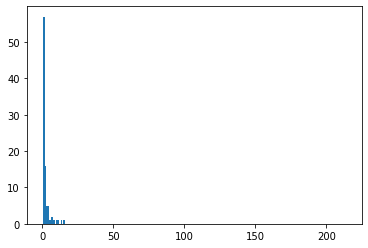

Calculating best minimal value for power law fit
/usr/local/lib/python3.7/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


2.4210729000386486
4.0


/usr/local/lib/python3.7/dist-packages/powerlaw.py:1605: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


In [5]:
class MyCounter(Counter):
  def __str__(self):
    return "\n".join('{} {}'.format(k, v) for k, v in self.items())

def getList(dict):
  return list(dict.keys())

location_count = MyCounter(ListOfLocations) 
location_count_dict = dict(Counter(ListOfLocations))
count_values = list(location_count_dict.values()) #list of values of location occurrences
count_location = getList(location_count_dict) #list of locations, no dublicates and in same order as previous values
location_counter = Counter(ListOfLocations)

print("\n\n",location_count, "\n") #prints all locations with their occurrences
plt.hist(count_values, bins=range(max(count_values))) #histogram of location occurrences
plt.show()

	#powerlaw distribution, can not be done with given values
results = powerlaw.Fit(count_values)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

In [6]:
import nltk
# nltk.download('punkt')

def length_post(post):
  sent_text = nltk.sent_tokenize(post)
  words = [word for sent in sent_text for word in nltk.word_tokenize(sent) if word.isalpha()]
  # print(len(words), words)

  return len(words)

# comm =ListOfPosts[-3].comment
# length_post(comm)

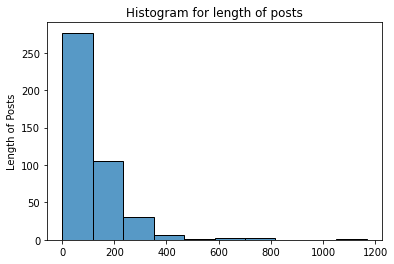

In [7]:
# *************** Part 3 *******************
import matplotlib.pyplot as plt
import seaborn as sns

lengths = []
for post in ListOfPosts:
  lengths.append( length_post(post.comment) )
  
sns.histplot(lengths, bins=10)
plt.ylabel('Length of Posts')
plt.title('Histogram for length of posts')
plt.show()